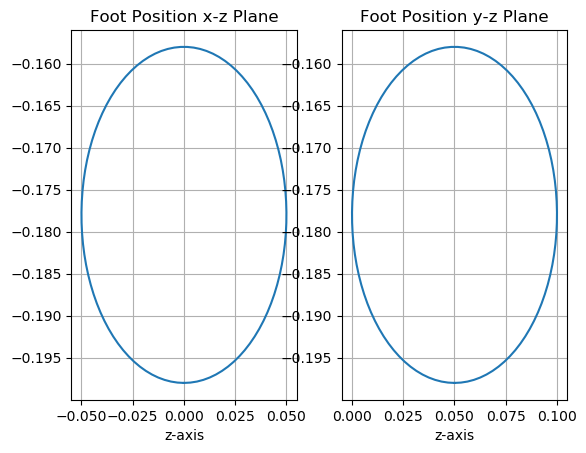

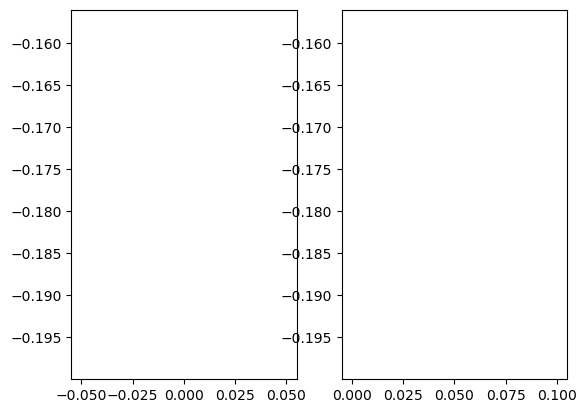

In [10]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter

theta = np.linspace(90, 450, num=100)
theta = theta /180*math.pi
a = 0.05
b = 0.02
footPos_desTraj = np.zeros((len(theta), 3))
center = np.array([0, 0.05, - 0.178])
for i in range(len(theta)):
    x = a * math.cos(theta[i])
    y = a * math.cos(theta[i])
    z = - b * math.sin(theta[i])
    cur_point  = center + np.array([x, y, z])
    footPos_desTraj[i, 0:3] = cur_point

## Static Plot
fig, axs = plt.subplots(1, 2)
# supTitle = 'PD Tuning Test with Kp: ' + np.array2string(Kp) + ' and Kd: ' + np.array2string(Kd)
# fig.suptitle(supTitle)

axs[0].plot(footPos_desTraj[:, 0], footPos_desTraj[:, 2])
# axs[0].plot(footPos_desTraj[:, 0], footPos_desTraj[:, 2])
axs[0].set_title("Foot Position x-z Plane")
axs[0].grid()
axs[0].set_xlabel('x-axis')
axs[0].set_xlabel('z-axis')

axs[1].plot(footPos_desTraj[:, 1], footPos_desTraj[:, 2])
# axs[0,1].plot(footPos_desTraj[:, 1], footPos_desTraj[:, 2])
axs[1].set_title("Foot Position y-z Plane")
axs[1].grid()
axs[1].set_xlabel('y-axis')
axs[1].set_xlabel('z-axis')

plt.show()

#####################################################################
## Animation
fig2, ax2 = plt.subplots(1, 2)
line1, = ax2[0].plot(footPos_desTraj[:, 0], footPos_desTraj[:, 2])
line2, = ax2[1].plot(footPos_desTraj[:, 1], footPos_desTraj[:, 2])
# line2, = ax2.plot(footPos_des_list_x, footPos_des_list_z)
def animate(i):
    line1.set_xdata(footPos_desTraj[:, 0][0:i+1])
    line1.set_ydata(footPos_desTraj[:, 2][0:i+1])
    line2.set_xdata(footPos_desTraj[:, 1][0:i+1])
    line2.set_ydata(footPos_desTraj[:, 2][0:i+1])
    return line1, line2
ani = animation.FuncAnimation(
    fig2, animate, interval=20, blit=True, save_count=100)

# ani.save("simple_animation.gif", dpi=300,
#          writer=PillowWriter(fps=5))
plt.show()